In [1]:
#importing intial libraries
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd() # checking the working directory

'C:\\Users\\Deep\\Desktop\\Data Scientist\\Project\\Project 1\\Project'

In [3]:
#loading files into the dataframe

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
#checking shape
print(df_train.shape)
print(df_test.shape)


# here the train dataset has 200000 entries and 202 columns in train data set and 201 in test data set


(200000, 202)
(200000, 201)


In [5]:
df_train.head()

# so the given dataset has ID_code with Target assuming zero being yes and 1 being no
# there are 200 values along with the 2 Id_code and target variable.


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
df_test.head()
#here the target variable is missing whcih is what we have to predict in the given dataset


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [7]:
#checking for missing values in the given dataset 

missing_train = df_train.isnull().sum().sum()
print(missing_train)
print("______________________________________________________________")
missing_test = df_test.isnull().sum().sum()
print(missing_test)


# there are no missing values in both the dataset 

0
______________________________________________________________
0


In [8]:
# after checking the null values or missing values in the dataset
# I think we can go further with exploratory analysis 

In [9]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [11]:
# oberservation here the min max is very close in the range 
# the standard deviation is in the higher values.
# the mean range is in a higer range 

In [12]:
#Target Class Count
Tgt_cls=df_train['target'].value_counts()
print('Count of the target class :\n' , Tgt_cls)

#Percentage of target class count
Per_tgt_cls=df_train['target'].value_counts()/len(df_train)*100
print('Percentage of target class count :\n', Per_tgt_cls)

Count of the target class :
 0    179902
1     20098
Name: target, dtype: int64
Percentage of target class count :
 0    89.951
1    10.049
Name: target, dtype: float64


In [13]:
# We are having an imbalanced data, where 89.951% of the data is no. of customers who will not make a transaction (0) 
#& 10.049 % of the data are those who will make a transaction(1).


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

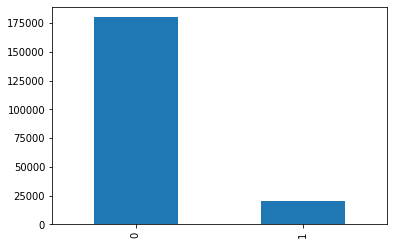

In [15]:
df_train['target'].value_counts().plot(kind = 'bar')

In [16]:
# the target dataset distribution is imbalance set as seen in the graph above.


In [17]:
# checking the distribution of the train attributes
def plot_dist(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for att in train_attributes :
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[att],hist=False,label=label1)
        sns.distplot(t1[att],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()


<Figure size 432x288 with 0 Axes>

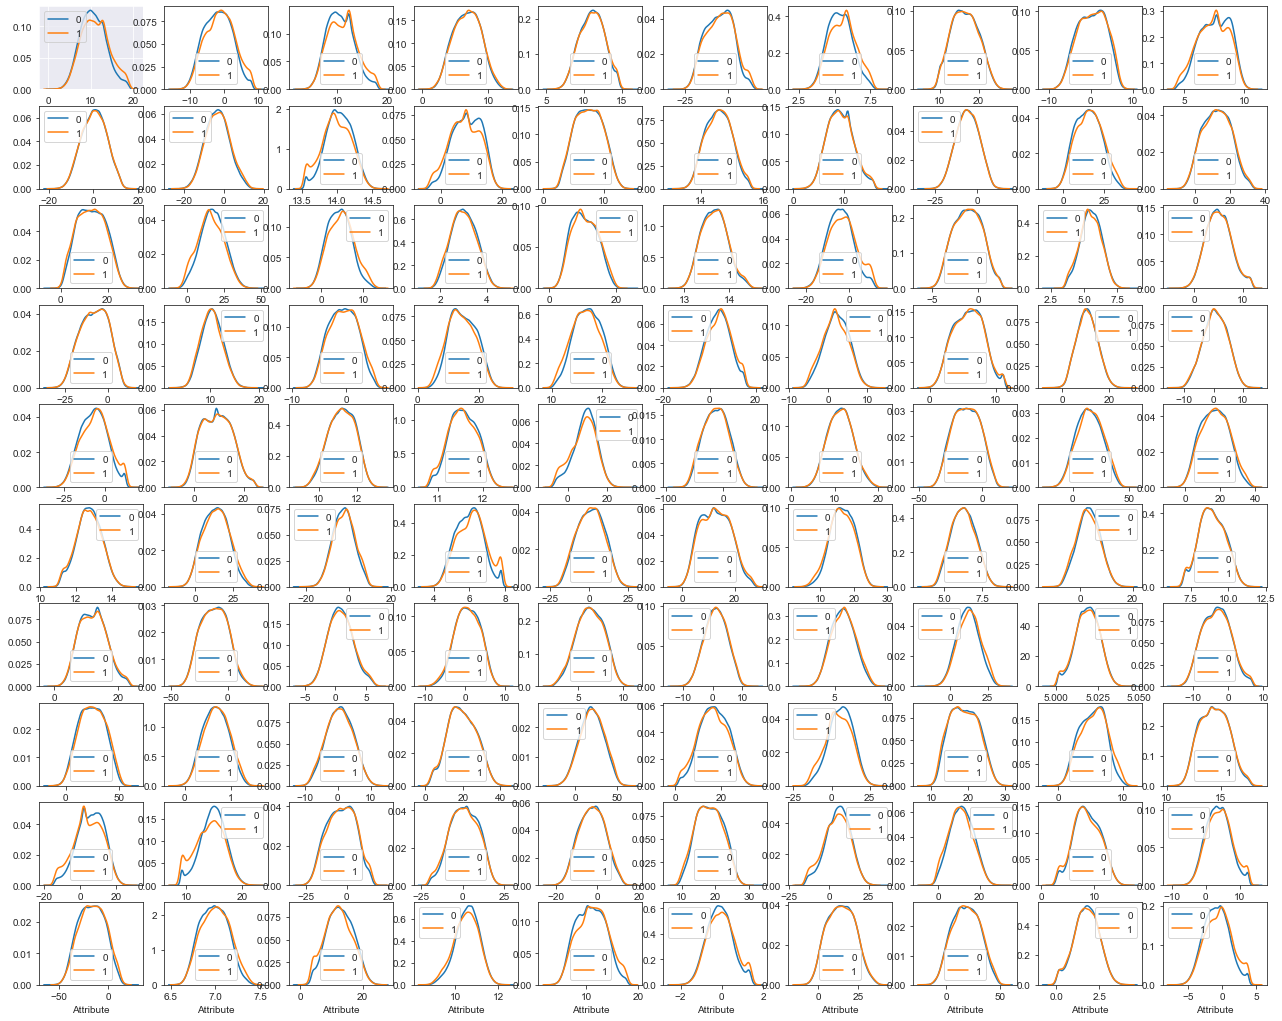

<Figure size 432x288 with 0 Axes>

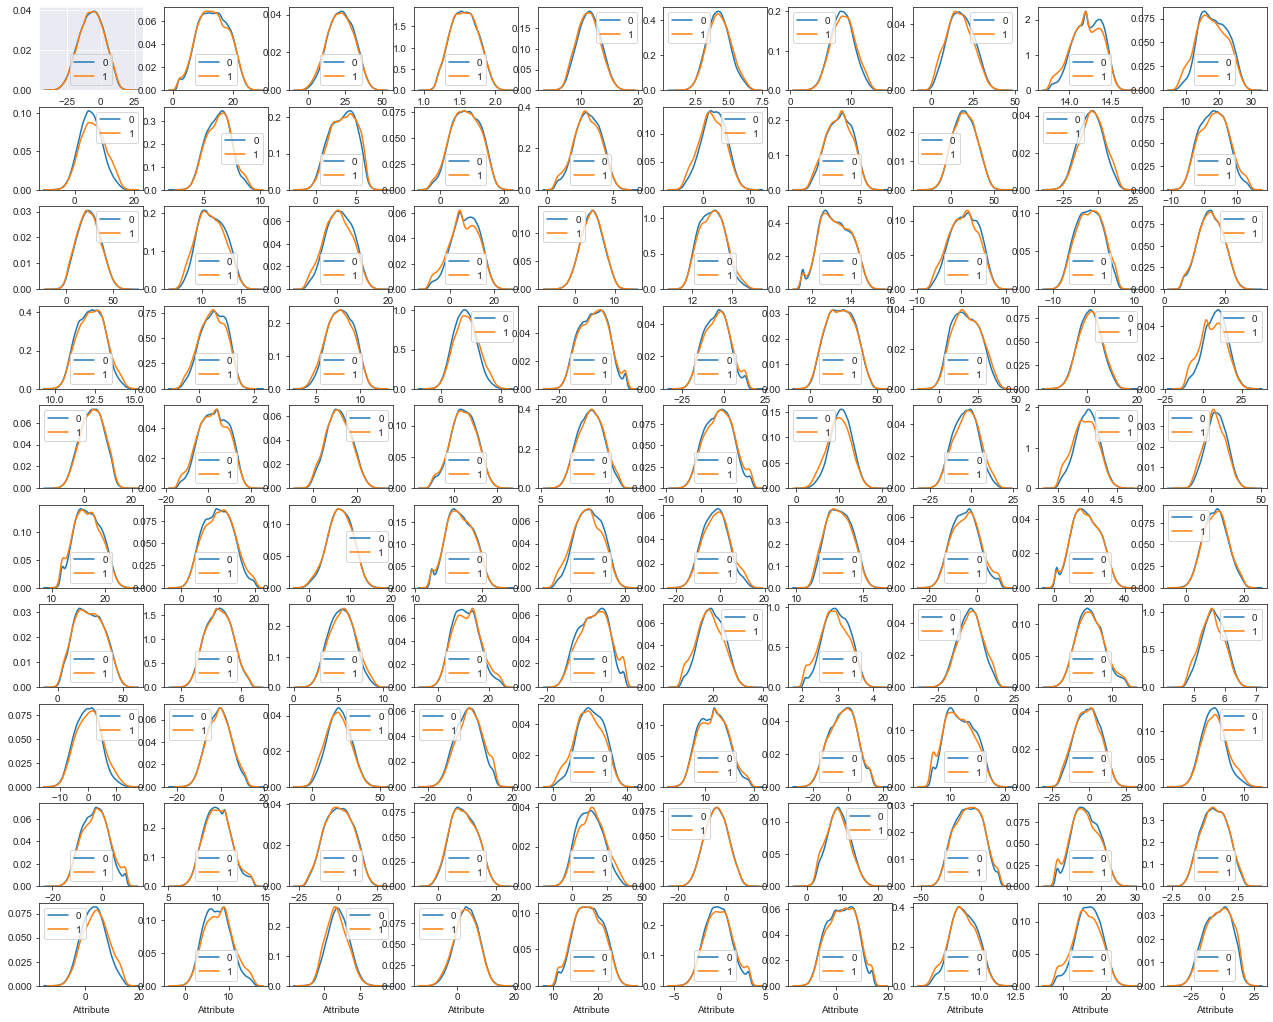

In [18]:
#Corresponding to negative class-
t0=df_train[df_train.target.values==0]

#Corresponding to possitive class-
t1=df_train[df_train.target.values==1]

#train attributes from 2 to 102 -
train_attributes=df_train.columns.values[2:102]
#trai attributes from 102 to 201
train_attributes2 =df_train.columns.values[102:]

#Plot distribution of train attributes-
plot_dist(t0,t1,'0','1',train_attributes)
plot_dist(t0,t1,'0','1',train_attributes2)

In [19]:
#We can observed that their is a considerable no. of features which are significantly have different distribution for two target variables. 
#For example like var_0,var_1,var_9,var_198 var_180 etc.

#We can observed that their is a considerable number of features which are significantly have same distribution for two target variables. 
#For example like var_3,var_7,var_10,var_171,var_185 etc.

In [20]:
# implying the same distribution on the test dataset

In [21]:
#Distribution of test attributes-

def plot_ta_dist(test_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(df_test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

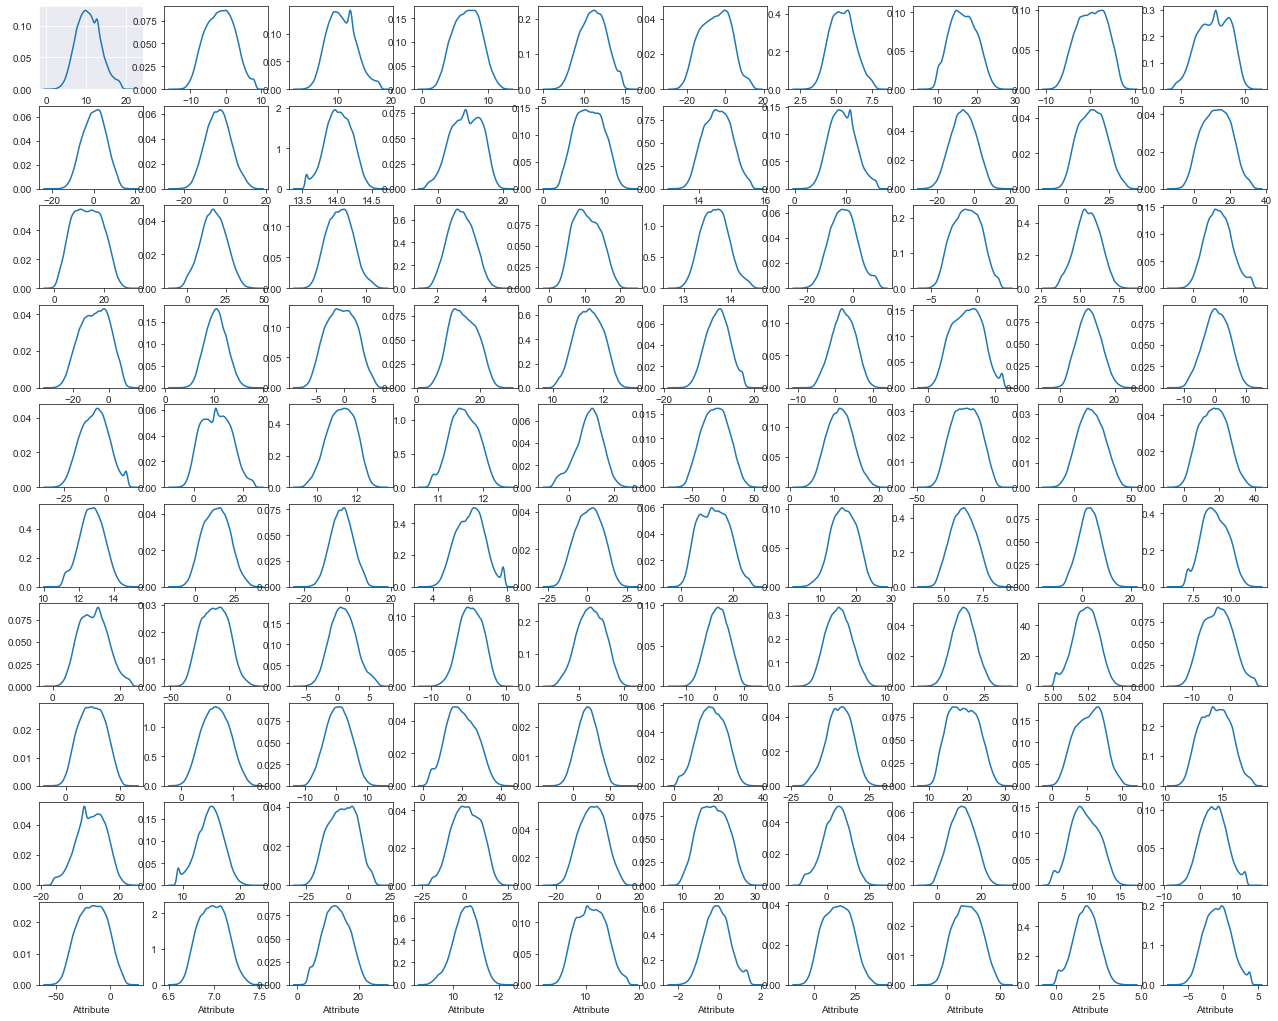

<Figure size 432x288 with 0 Axes>

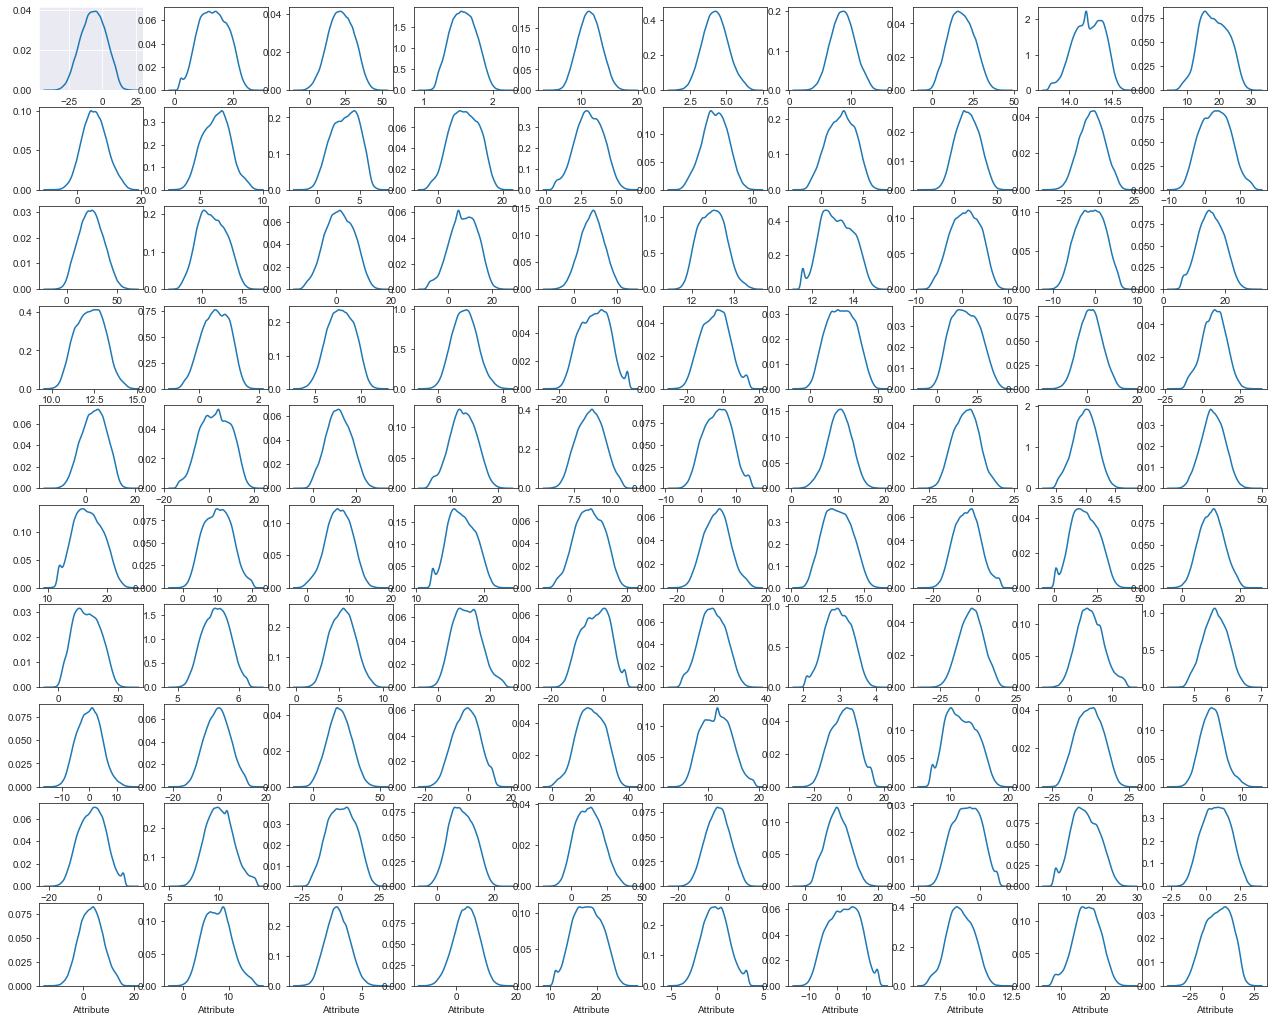

In [22]:
#test attribiutes from 1 to 200 in two parts -
test_attributes=df_test.columns.values[1:101]
test_attributes1=df_test.columns.values[101:]

#Plot distribution of test attributes -
plot_ta_dist(test_attributes)
plot_ta_dist(test_attributes1)

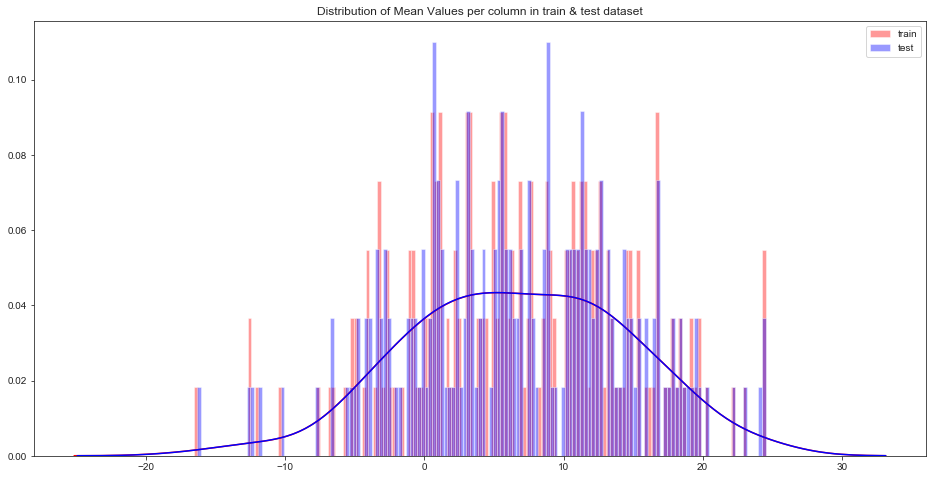

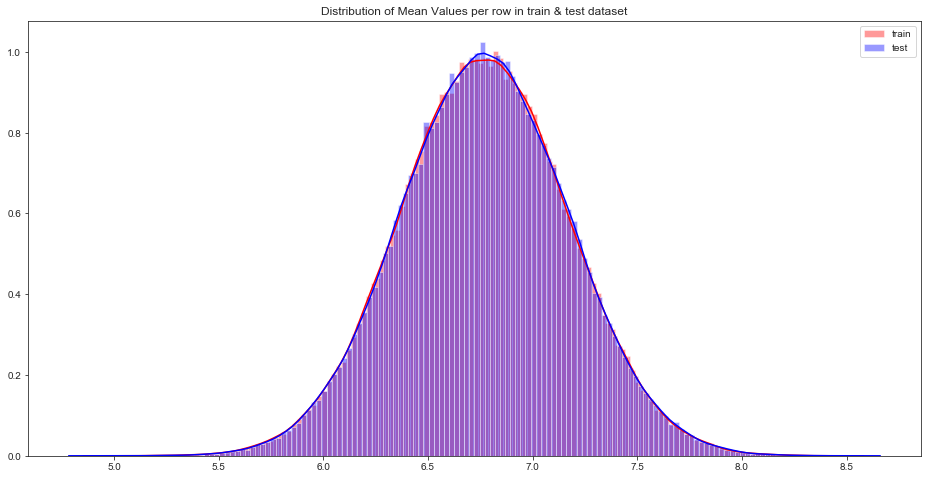

In [23]:
#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for mean values per column in train attributes:
sns.distplot(df_train[train_attributes].mean(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per column in test attributes:
sns.distplot(df_test[test_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for mean values per rows in train attributes:
sns.distplot(df_train[train_attributes].mean(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per rows in test attributes:
sns.distplot(df_test[test_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per row in train & test dataset')
plt.legend()
plt.show()

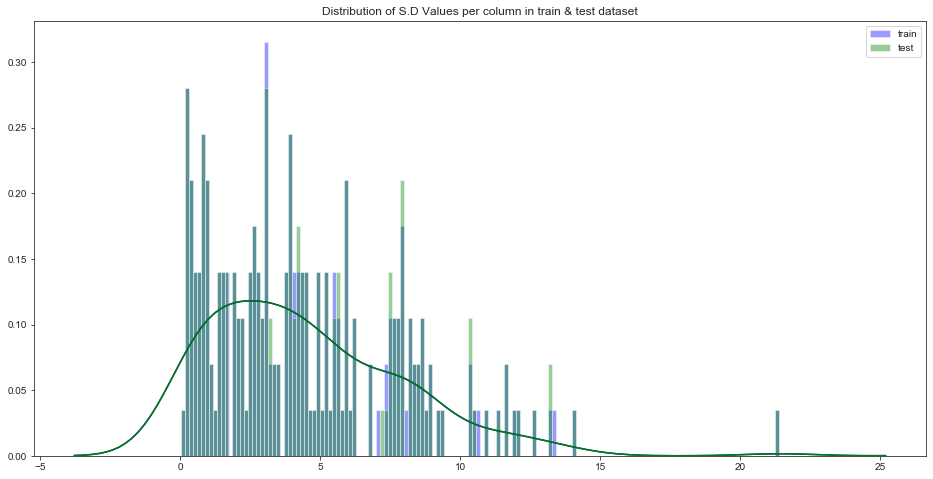

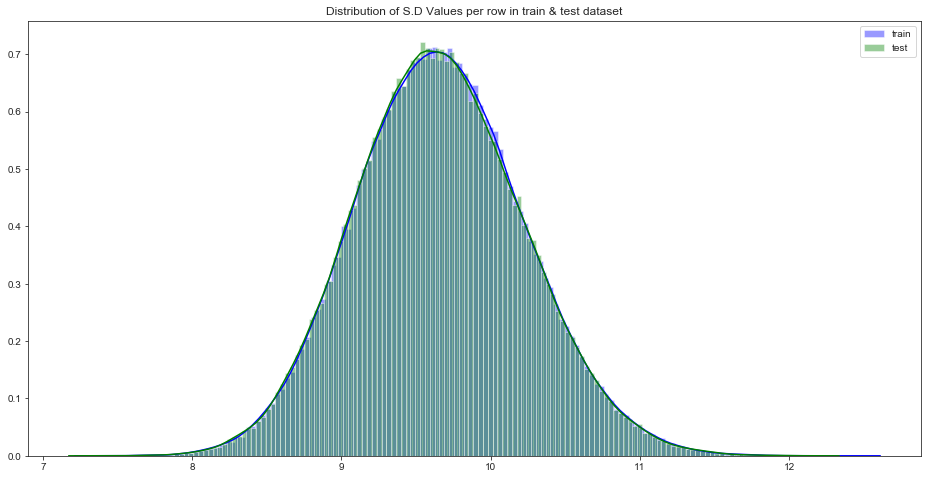

In [24]:
#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for S.D values per column in train attributes:
sns.distplot(df_train[train_attributes].std(axis=0),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per column in test attributes:
sns.distplot(df_test[test_attributes].std(axis=0),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for S.D values per rows in train attributes:
sns.distplot(df_train[train_attributes].std(axis=1),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per rows in test attributes:
sns.distplot(df_test[test_attributes].std(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per row in train & test dataset')
plt.legend()
plt.show()

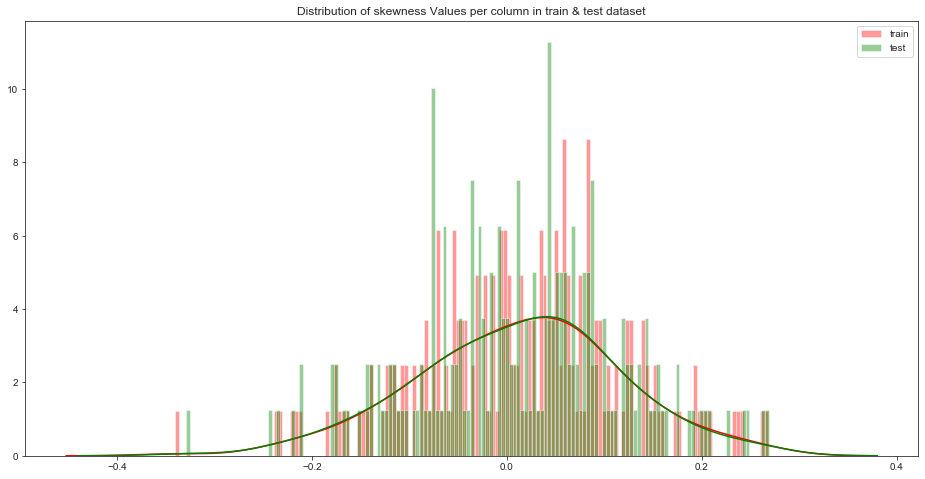

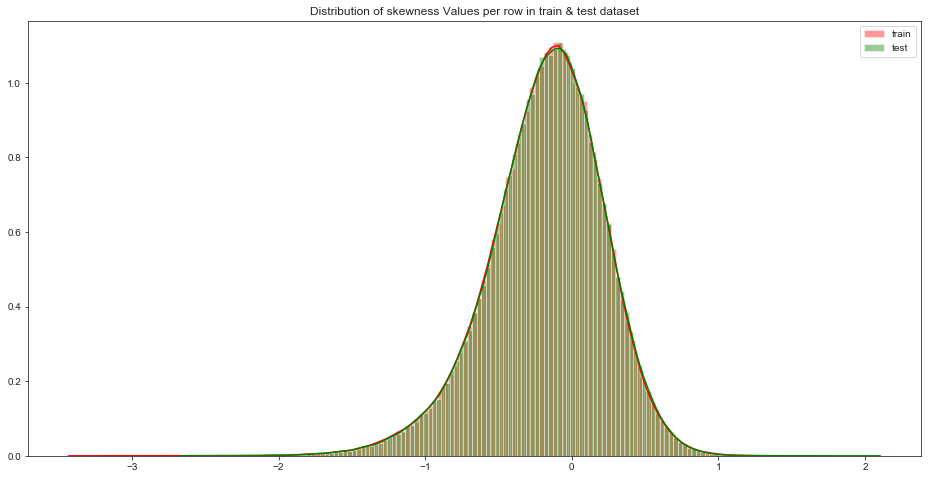

In [25]:
#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for skew values per column in train attributes:
sns.distplot(df_train[train_attributes].skew(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for skew values per column in test attributes:
sns.distplot(df_test[test_attributes].skew(axis=0),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for skew values per rows in train attributes:
sns.distplot(df_train[train_attributes].skew(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for skew values per rows in test attributes:
sns.distplot(df_test[test_attributes].skew(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per row in train & test dataset')
plt.legend()
plt.show()

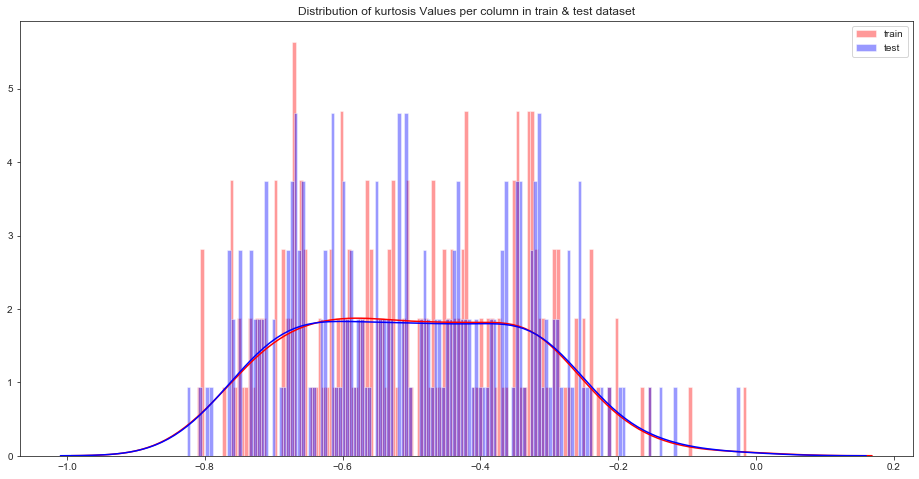

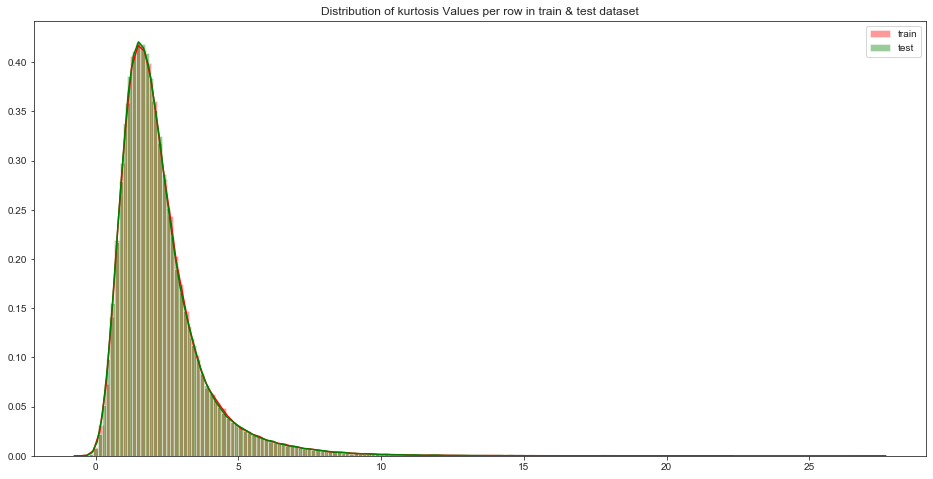

In [26]:
#Distribution of kurtosis Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for kurtosis values per column in train attributes:
sns.distplot(df_train[train_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for kurtosis values per column in test attributes:
sns.distplot(df_test[test_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of kurtosis Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of kurtosis Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for kurtosis values per rows in train attributes:
sns.distplot(df_train[train_attributes].kurtosis(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for kurtosis values per rows in test attributes:
sns.distplot(df_test[test_attributes].kurtosis(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of kurtosis Values per row in train & test dataset')
plt.legend()
plt.show()


In [27]:
# finding the correlation in the train attributes

train_attribute_correlation = df_train.columns.values[2:202]
train_correlation = df_train[train_attribute_correlation].corr()
train_correlation.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786


In [28]:
#Its visible that correlation between train attributes is very small.

In [29]:
#finding the correlation in the test attributes

test_attribute_correlation = df_test.columns.values[2:]
test_correlation = df_test[test_attribute_correlation].corr()
test_correlation.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_1,1.000000,0.002912,-0.002148,0.000716,0.001393,0.003567,0.003024,0.000778,-0.002643,-0.001371,...,0.002032,0.003477,-0.003454,0.000345,0.000126,0.001339,-0.001627,-0.002839,-0.003024,0.001861
var_2,0.002912,1.000000,-0.005882,0.003657,0.000283,-0.001141,-0.000273,0.001231,0.000041,0.004215,...,-0.001765,0.001144,-0.005496,0.002027,-0.002396,0.001333,-0.002400,-0.002726,-0.001537,0.000229
var_3,-0.002148,-0.005882,1.000000,-0.000959,0.001644,-0.003074,0.001945,-0.001443,-0.001291,-0.000787,...,-0.001630,0.002119,0.001269,-0.006136,0.000289,0.001601,0.003177,0.002780,-0.002625,-0.003034
var_4,0.000716,0.003657,-0.000959,1.000000,0.004822,-0.003284,-0.000167,0.003138,0.000093,-0.001197,...,-0.003106,0.002473,-0.000734,-0.000754,-0.000427,0.003046,-0.001317,0.000425,-0.002146,0.000401
var_5,0.001393,0.000283,0.001644,0.004822,1.000000,-0.003555,0.002837,0.001955,0.002249,0.001320,...,-0.000660,0.002662,-0.002652,-0.001209,0.000997,0.002676,-0.002445,-0.003665,-0.004626,0.001638


In [30]:
#Its visible that correlation between test attributes is very small.

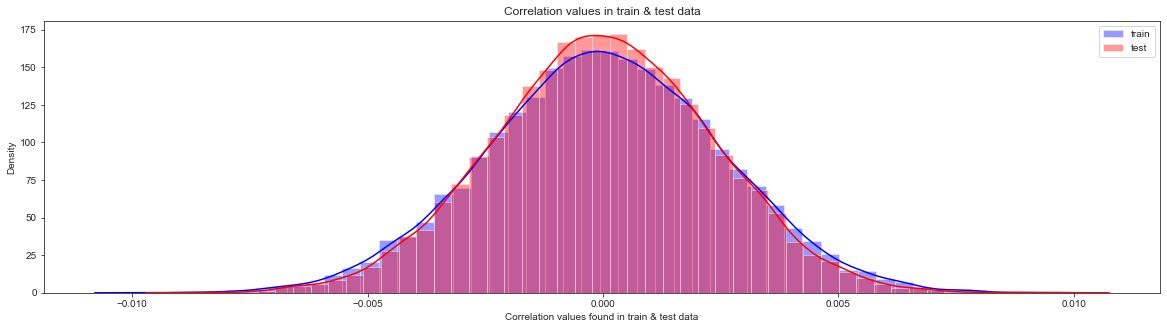

In [31]:
train_correlation=df_train[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]


test_correlation=df_test[test_attributes].corr()
test_correlation=test_correlation.values.flatten()
test_correlation=test_correlation[test_correlation!=1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlation,color="blue",label="train")
sns.distplot(test_correlation,color="red",label="test")
plt.xlabel("Correlation values found in train & test data")
plt.ylabel("Density")
plt.title ("Correlation values in train & test data")
plt.legend()

In [32]:
#The correlation between the train and test data is very small, its completely visible from the above graph

In [33]:
#Feature engineering: Permutation Importance  

In [34]:
#training data & test data
X = df_train.drop(columns=['ID_code','target'],axis=1) # dropping the target values and the ID code as id is not needed and target values is a dependent variable
test = df_test.drop(columns=['ID_code'],axis = 1)
y = df_train['target']

In [35]:
print(X.shape)
print(y.shape)
print(X)
print(y)

(200000, 200)
(200000,)
          var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...

In [36]:
# Building a model to find out which features are important based on the weights value returned
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,auc

In [37]:
#Split the train data:-
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [38]:
rf_model=RandomForestClassifier(n_estimators=7,random_state=10)

#fitting the model:-
rf_model.fit(X_test,y_test)

RandomForestClassifier(n_estimators=7, random_state=10)

In [39]:
#Calucating weights & Observing some Important features via using eli5 library- 
#ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.
#Permutation Importance:-
#pip install "eli5"
import eli5
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=10)

#fitting the model:-
perm_imp.fit(X_test,y_test)

PermutationImportance(estimator=RandomForestClassifier(n_estimators=7,
                                                       random_state=10),
                      random_state=10)

In [40]:
#Important Features:-
eli5.show_weights(perm_imp,feature_names=X_test.columns.tolist(),top=200)

Weight,Feature
0.0180 ± 0.0008,var_81
0.0134 ± 0.0005,var_146
0.0121 ± 0.0008,var_21
0.0113 ± 0.0009,var_53
0.0107 ± 0.0005,var_12
0.0093 ± 0.0004,var_139
0.0077 ± 0.0008,var_0
0.0068 ± 0.0005,var_110
0.0065 ± 0.0004,var_80
0.0062 ± 0.0005,var_2


In [41]:
#Importance of features is decreasing as we move down the top of column.
#Fetaures showing in green indicates they are having positive impact on our prediction.
#Features showing in white showing they have no impact on prediction.
#Most imprtant feature is var_81.

In [42]:
#Handling of imblanced data:- We are going to use multiple approaches for dealing with imbalanced datasets.

#Change of performance matrix.
#Oversample minority class.
#Undersample majority class.
#SMOTE ( Synthetic Minority Oversampling technique)
#Change of algorithms.


In [43]:
#Logistic Regression Model:-
#Spliting the data via Sratified KFold Cross Validator:-

#Training Data:
X=df_train.drop(['ID_code','target'],axis=1)
Y=df_train['target']

#Stratified KFold Cross Validator:-
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, valid_index in skf.split(X,Y): 
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] 
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
    
print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160000, 200)
Shape of X_valid : (40000, 200)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


In [44]:
# Logistic Regression Model:- 

In [45]:
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [46]:
#Accuracy of model-
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of lr_model :',lr_score)

Accuracy of lr_model : 0.91219375


In [47]:
#accuracy score : 0.91

In [48]:
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.91045


In [49]:
#Accuracy of the model is not th best metric to use while evaluating the imbalanced datasets as it may be misleading. 
#We are going to change the performance metric.

In [50]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,0,1
target,,
0,35485,495
1,3087,933


In [51]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC Score:',roc_score)

ROC Score: 0.6091659545518655


In [52]:
# Roc score is 0.61

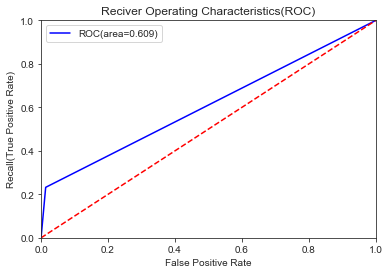

AUC: 0.6091659545518655


In [53]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [54]:
#AUC score is 0.61 
#On comparing roc_auc_score and model accuracy, model is not performing well on imbalanced data.

In [55]:
#Classification report:-
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



In [56]:
#As we see that f1 score is high for the customers who will not make a transaction, compare to those who will make a transaction. 
#So, we are going to change the algorithm.

In [57]:
#Model performance on test data:-
X_test=df_test.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]


In [58]:
'''Oversample Minority Class:-

-Adding more copies of minority class.
-It can be a good option we dont have that much large data to work.
-Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.
Undersample Mojorityclass:-

-Removing some copies of majority class.
-It can be a good option if we have very large amount of data say in millions to work.
-Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.
As per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.

SMOTE ( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.'''

"Oversample Minority Class:-\n\n-Adding more copies of minority class.\n-It can be a good option we dont have that much large data to work.\n-Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.\nUndersample Mojorityclass:-\n\n-Removing some copies of majority class.\n-It can be a good option if we have very large amount of data say in millions to work.\n-Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.\nAs per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.\n\nSMOTE ( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model."

In [59]:
#pip install imblearn

In [60]:
#pip install -U imbalanced-learn --user

In [61]:
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42, sampling_strategy=1.0)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

In [62]:
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=10)
#fitting the smote model:-
smote.fit(X_smote,y_smote)

LogisticRegression(random_state=10)

In [63]:
#Accuracy of the model:-
smote_score=smote.score(X_smote,y_smote)
print(smote_score)
# the accuracy of the model is 0.78

0.7890871444254527


In [64]:
#Cross validation prediction for SMOTE:-
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score:-
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('Cross validation score :',np.average(cv_score))

Cross validation score : 0.7970539188438022


In [65]:
#Confusion matrix:-
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)
cm

col_0,0,1
target,,
0,28222,7758
1,6846,29134


In [66]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score:',roc_score)

ROC score: 0.7970539188438022


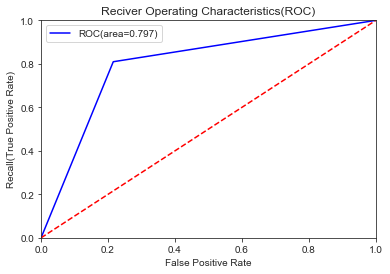

AUC: 0.7970539188438022


In [67]:
#ROC_AUC Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [68]:
#Classification Report:-
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



In [69]:
#Observation:- As we see that f1 score is high for the customers who will not make a transaction, 
#as well as who will make a transaction.

In [70]:
#Model_performance on test data:-

In [71]:
#Predicting the model-
X_test=df_test.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]


In [72]:
# What I observed was that the model is performing well on imbalance data as compare to logistic regression.

In [73]:
#Light GBM:- It is a gradient boosting framework that uses tree based learning algorithm.

In [74]:
#pip install lightgbm
import lightgbm as lgb

In [75]:
#Training data-
lgb_train=lgb.Dataset(X_train,label=y_train)

#Validation data-
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

In [76]:
#Selecting best hyperparameters by tuning of different parameters:-
params={'boosting_type': 'gbdt',
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [77]:
#Training lgbm model:-
num_rounds= 1000  
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 500)
lgbm

[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 16078, number of negative: 143922
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[

In [78]:
#Did not meet early stopping. Best iteration is:
#[1000]	training's auc: 0.930752	valid_1's auc: 0.873942

In [79]:
#LGBM model performance on test data
X_test=df_test.drop(['ID_code'],axis=1)
#Predict the model:-

#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)

#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)


[0.66355527 0.6489729  0.51326683 ... 0.21530963 0.57502739 0.49774189]
[1 1 1 ... 0 1 0]


In [80]:
#Plotting of important Features:-

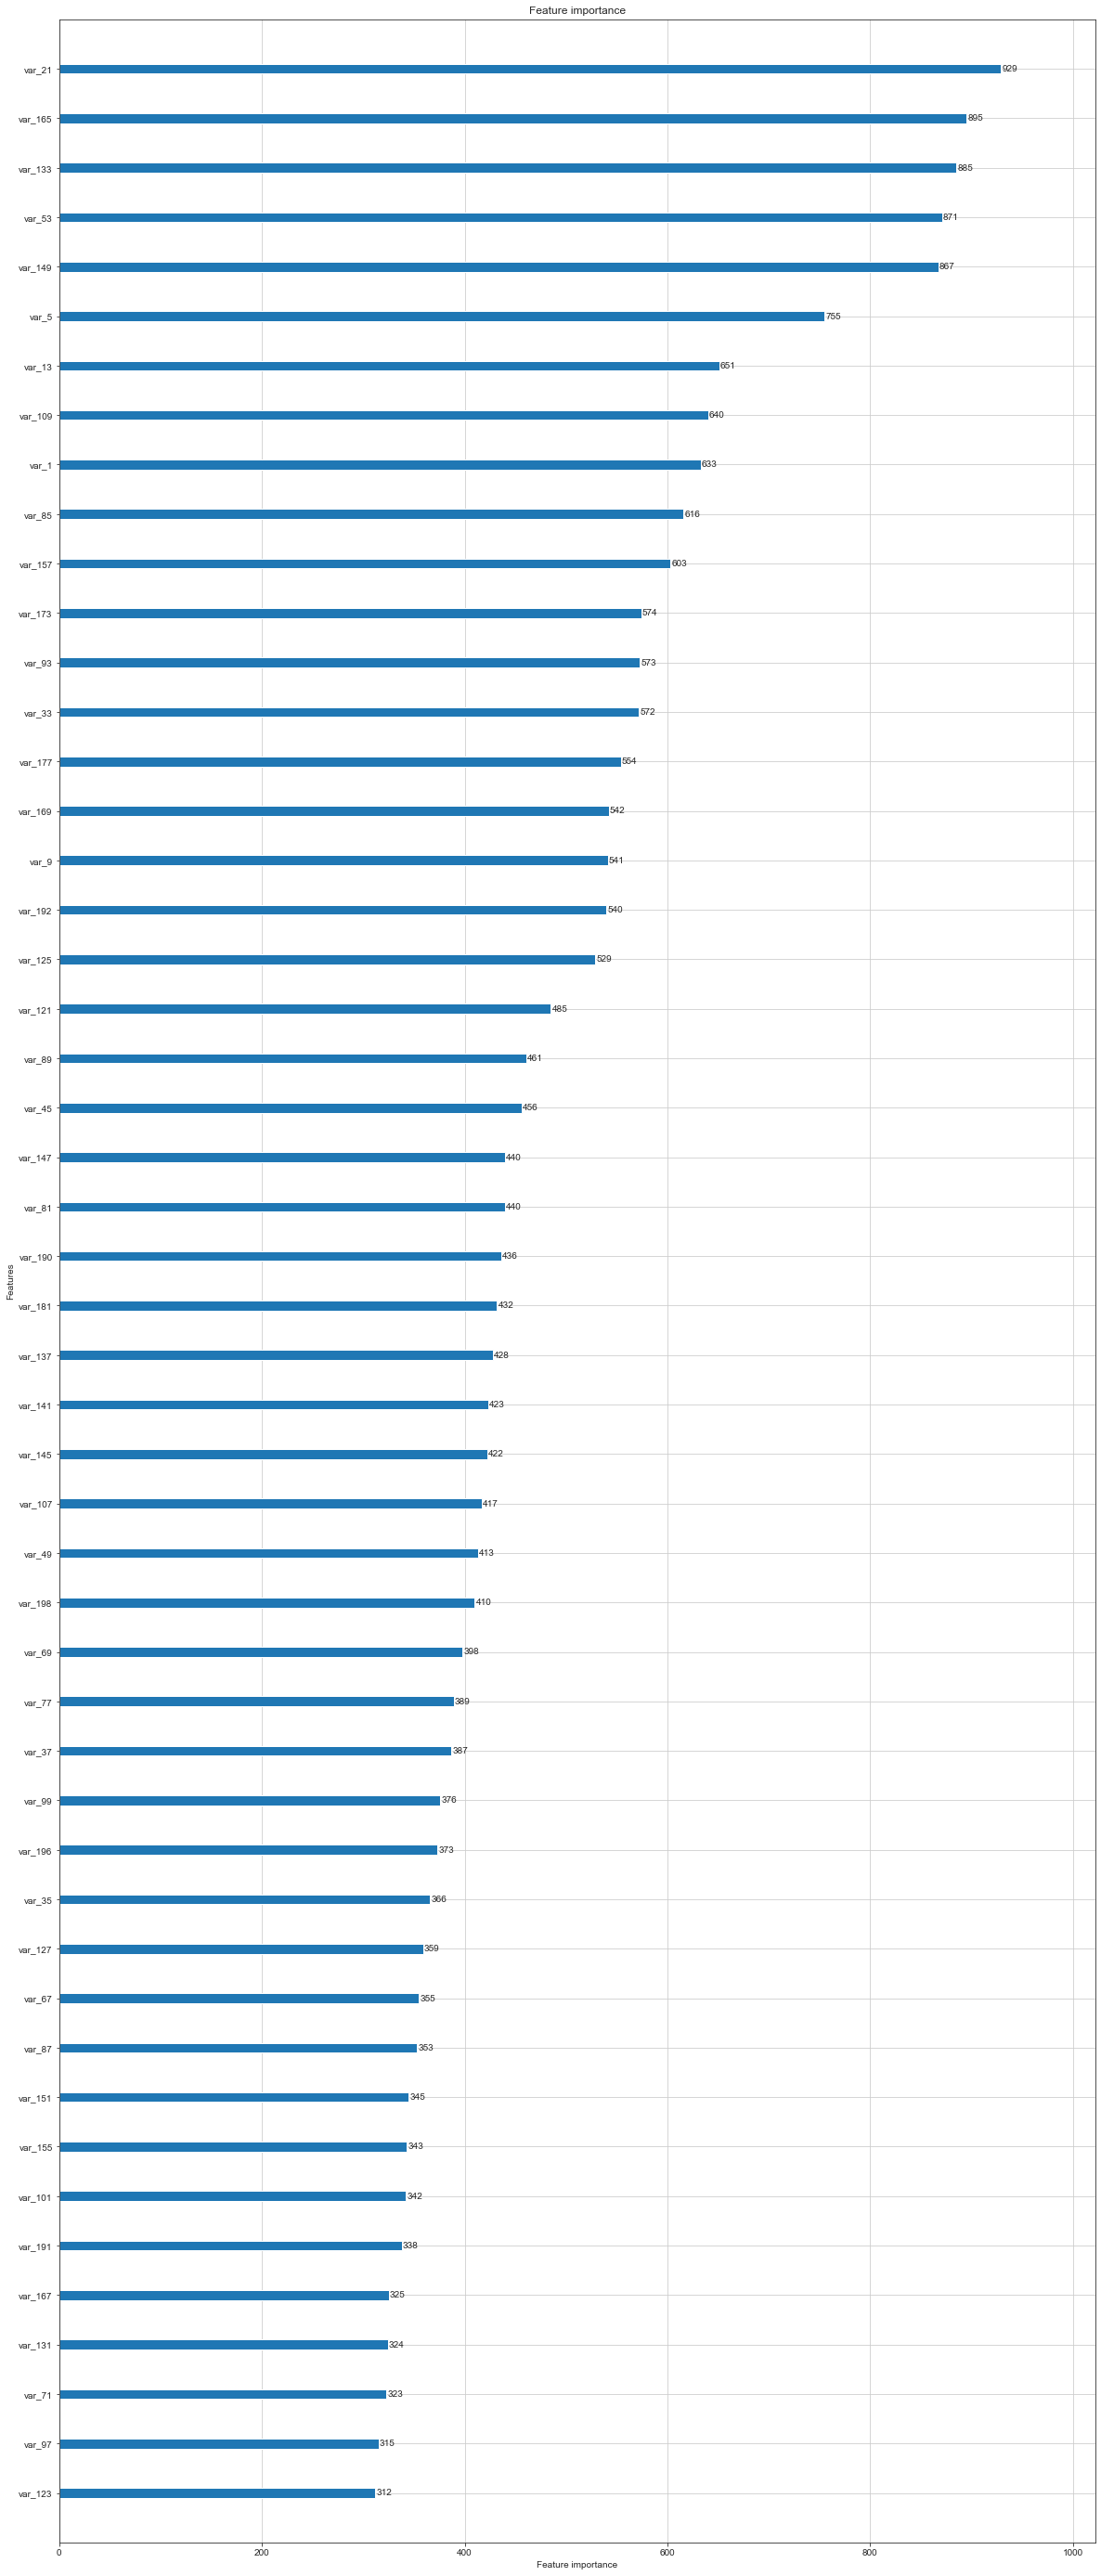

In [81]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [113]:
#Conclusion:- We have tried with diff model like Logistic regression,smote & lightgbm. 
#But we observed that light gbm is performing well on imbalanced data as compare to other models based on the roc_auc scores.

In [117]:
df_sub=pd.DataFrame({'ID_code':df_test['ID_code'].values})
df_sub['lgbm_predict_prob']=lgbm_predict_prob
df_sub['lgbm_predict']=lgbm_predict
df_sub.to_csv('submission_python.csv',index=False)
df_sub.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.663555,1
1,test_1,0.648973,1
2,test_2,0.513267,1
3,test_3,0.444652,0
4,test_4,0.232878,0
